## Coursera Capstone Project

## Best Riyadh District for a new Cafe- Analysis Study

This notebook will include all the code and plots needed for this analysis study

In [1]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
import pandas as pd
import numpy as np
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    lib

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
riyadh_data = pd.read_csv('riyadh_districts.csv', index_col=0)
riyadh_data.head()

,district,latitude,longitude
0,Al Amal Dist.,24.645703,46.719765
1,Al Namudhajiyah Dist.,24.650184,46.698655
2,Al Jarradiyah Dist.,24.618163,46.694832
3,Al Sinaiyah Dist.,24.648146,46.737433
4,Manfuha Al Jadidah Dist.,24.614977,46.714758


Some Data Cleansing

In [4]:
riyadh_data['latitude'].dropna(axis=0, inplace=True)
riyadh_data['longitude'].dropna(axis=0, inplace=True)
riyadh_data.shape

(187, 3)

Visualize Riyadh Districts on the map

In [5]:
# Get Riyadh Latitude and Lonitude Coordinates
address = 'Riyadh'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Riyadh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Riyadh are 24.6319692, 46.7150648.


In [6]:
# create map of Riyadh using latitude and longitude values
map_riyadh = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map for each district
for lat, lng, label in zip(riyadh_data['latitude'], riyadh_data['longitude'], riyadh_data['district']):
    if (lat is not np.nan and lng is not np.nan):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_riyadh)  
    
map_riyadh

## Foursquare API Credintials

In [10]:
CLIENT_ID = ''
CLIENT_SECRET = ''  
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: DH01K1OPPGDSEFMMWPYKYDYB0X0GY1XKMUBHN0YSNFQWKZD4
CLIENT_SECRET:T3ESFKYUUTRAZPQGZG5IGOWKENS4QMSPVN21L353JXS55Q1H


### Step 1: get nearby venues for each district

In [11]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# Run this for the first time to get the data
riyadh_venues= getNearbyVenues(names = riyadh_data['district'],
                                   latitudes=riyadh_data['latitude'],
                                   longitudes=riyadh_data['longitude'] )

In [22]:
# if you have already saved data
riyadh_venues = pd.read_csv('riyadh_venues.csv', index_col=0)
riyadh

In [23]:
riyadh_venues.shape

(1946, 9)

In [33]:
riyadh_venues.head()

,District,District Latitude,District Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Al Amal Dist.,24.645703,46.719765,4d53844765586ea8efb46cc8,Jollibee (جوليبي),24.645733,46.717801,Filipino Restaurant
1,Al Amal Dist.,24.645703,46.719765,4dd9493d7d8b3226641ca01d,CITY FOOD COURT,24.645615,46.717704,Fast Food Restaurant
2,Al Amal Dist.,24.645703,46.719765,4ff2a82de4b055dd1c18642d,Al-Garaawi,24.642024,46.717322,Shoe Store
3,Al Amal Dist.,24.645703,46.719765,5abbd263037be133288214d6,Podium,24.646380,46.715550,Boutique
4,Al Amal Dist.,24.645703,46.719765,5145f199e4b016faed62f9e4,Cusina,24.646406,46.716060,Asian Restaurant


In [ ]:
# save riyadh Venues
riyadh_venues.to_csv('riyadh_venues.csv')
riyadh_venues = pd.read_csv('riyadh_venues.csv', index_col=0)
riyadh_venues.head()

### Step 2: Calculate the "number of venues" which reflect how busy is the area

In [35]:
venue_count = pd.DataFrame(riyadh_venues.groupby('District').count()['Venue'])
venue_count.head()
riyadh_data.rename(columns = {'district':'District', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace =True)
riyadh_data =pd.merge(riyadh_data, venue_count, on='District')
riyadh_data.rename(columns = {'Venue':'Venue Count'}, inplace =True)
riyadh_data.head()

,District,Latitude,Longitude,Venue Count
0,Al Amal Dist.,24.645703,46.719765,37
1,Al Namudhajiyah Dist.,24.650184,46.698655,8
2,Al Jarradiyah Dist.,24.618163,46.694832,5
3,Al Sinaiyah Dist.,24.648146,46.737433,4
4,Manfuha Al Jadidah Dist.,24.614977,46.714758,4


### Step 3: Calculate the number of cafe per district

In [36]:
print('There are {} uniques categories.'.format(len(riyadh_venues['Venue Category'].unique())))

There are 228 uniques categories.


In [37]:
# one hot encoding
riyadh_onehot = pd.get_dummies(riyadh_venues[['Venue Category']], prefix="", prefix_sep="")

# add district column back to dataframe
riyadh_onehot['District'] = riyadh_venues['District'] 

# move district column to the first column
fixed_columns = [riyadh_onehot.columns[-1]] + list(riyadh_onehot.columns[:-1])
riyadh_onehot = riyadh_onehot[fixed_columns]

riyadh_onehot.head()

,District,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Gate,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bathing Area,Beach Bar,Bistro,Bookstore,Border Crossing,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Bridal Shop,Buffet,Burger Joint,Burmese Restaurant,Bus Stop,Business Service,Butcher,Cafeteria,Café,Campground,Canal,Canal Lock,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cupcake Shop,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner,Dutch Restaurant,Egyptian Restaurant,Electronics Store,Entertainment Service,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hunting Supply,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Lake,Lebanese Restaurant,Lingerie Store,Lounge,Luggage Store,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motel,Mountain,Movie Theater,Moving Target,Museum,Music Festival,Music Store,Music Venue,National Park,New American Restaurant,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Rental Car Location,Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stables,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theme Park,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tram Station,Travel Agency,Tree,Turkish Restaurant,Used Bookstore,Video Game Store,Video Store,Watch Shop,Water Park,Women's Store
0,Al Amal Dist.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Al Amal Dist.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### calculate frequency of each category in a district

In [38]:
riyadh_grouped = riyadh_onehot.groupby('District').sum().reset_index()
cafe_cols = [x for x in riyadh_grouped.columns if ('Café'in x or 'Coffee' in x)]
riyadh_data['Cafe Count'] = pd.DataFrame(riyadh_grouped[cafe_cols].sum(axis=1))


In [39]:
riyadh_data.head()

,District,Latitude,Longitude,Venue Count,Cafe Count
0,Al Amal Dist.,24.645703,46.719765,37,1
1,Al Namudhajiyah Dist.,24.650184,46.698655,8,2
2,Al Jarradiyah Dist.,24.618163,46.694832,5,2
3,Al Sinaiyah Dist.,24.648146,46.737433,4,2
4,Manfuha Al Jadidah Dist.,24.614977,46.714758,4,0












### Step 4: Calculating number of resturants, stores and schools in each district

In [40]:
restaurant_cols = [x for x in riyadh_grouped.columns if 'Restaurant' in x]
riyadh_data['Restaurant Count']= pd.DataFrame(riyadh_grouped[restaurant_cols].sum(axis=1))
riyadh_data.tail()

,District,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count
142,Al Khair Dist.,25.043959,46.449128,1,2,1
143,Al Fursan Dist.,25.005358,47.175888,2,2,0
144,Al Rayah Dist.,25.025324,47.204378,2,0,0
145,Al Bayan Dist.,24.865765,46.869208,2,9,3
146,Al Wasam Dist.,24.895240,46.903371,10,2,6


In [41]:
riyadh_data.tail()

,District,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count
142,Al Khair Dist.,25.043959,46.449128,1,2,1
143,Al Fursan Dist.,25.005358,47.175888,2,2,0
144,Al Rayah Dist.,25.025324,47.204378,2,0,0
145,Al Bayan Dist.,24.865765,46.869208,2,9,3
146,Al Wasam Dist.,24.895240,46.903371,10,2,6


In [42]:
store_cols = [x for x in riyadh_grouped.columns if ('Store' in x or 'Shope' in x)]
riyadh_data['Store Count']= pd.DataFrame(riyadh_grouped[store_cols].sum(axis=1))
riyadh_data.head()

,District,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count,Store Count
0,Al Amal Dist.,24.645703,46.719765,37,1,11,9
1,Al Namudhajiyah Dist.,24.650184,46.698655,8,2,4,4
2,Al Jarradiyah Dist.,24.618163,46.694832,5,2,0,0
3,Al Sinaiyah Dist.,24.648146,46.737433,4,2,1,0
4,Manfuha Al Jadidah Dist.,24.614977,46.714758,4,0,2,0


In [43]:
school_cols = [x for x in riyadh_grouped.columns if 'School' in x ]
riyadh_data['School Count']= pd.DataFrame(riyadh_grouped[school_cols].sum(axis=1))
riyadh_data.head()

,District,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count,Store Count,School Count
0,Al Amal Dist.,24.645703,46.719765,37,1,11,9,0.0
1,Al Namudhajiyah Dist.,24.650184,46.698655,8,2,4,4,0.0
2,Al Jarradiyah Dist.,24.618163,46.694832,5,2,0,0,0.0
3,Al Sinaiyah Dist.,24.648146,46.737433,4,2,1,0,0.0
4,Manfuha Al Jadidah Dist.,24.614977,46.714758,4,0,2,0,0.0


In [44]:
riyadh_data['School Count'].max()

0.0

In [45]:
# Delete School Count Column as there is no schools returned from Foursquare
riyadh_data.drop('School Count', axis=1, inplace=True)

### Step 5: Calculating avg Cafe rate per district

In [46]:
# prepare Cafe data
riyadh_coffee = riyadh_venues[riyadh_venues['Venue Category'].str.contains('Coffee') ]
riyadh_cafe = riyadh_venues[riyadh_venues['Venue Category'].str.contains('Café') ]
riyadh_cafe = pd.concat([riyadh_coffee, riyadh_cafe], ignore_index= True)
#riyadh_cafe = riyadh_cafe[['District', 'Venue', 'Venue Latitude', 'Venue Longitude']]
riyadh_cafe.head()

,District,District Latitude,District Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Al Namudhajiyah Dist.,24.650184,46.698655,573c5330cd10c16feed7f972,Java cafe Al Washm (جافا كافيه الوشم),24.650939,46.703281,Coffee Shop
1,Al Sinaiyah Dist.,24.648146,46.737433,5719f5fe498ecff1fb63b781,Starbucks (ستاربكس),24.650643,46.740358,Coffee Shop
2,Al Dirah Dist.,24.631157,46.714473,5c6976a17c891c003a4d16f2,Elixir Bunn Coffee Roasters (محمصة اكسير البن),24.630936,46.712279,Coffee Shop
3,Al Dirah Dist.,24.631157,46.714473,5294ec4011d2ce5d6a3373ba,Bread And Coffee (رغيف وكيف),24.630363,46.711909,Coffee Shop
4,Al Dirah Dist.,24.631157,46.714473,5daa086c6bfe6b00080bd40a,(Zad) زادّ,24.630958,46.712257,Coffee Shop


In [47]:
riyadh_cafe.shape

(261, 8)

In [50]:
# Get rating for each Cafe from Foursquare
    ## loop over riyadh_cafe
results = {}
Venue_Rating = []
Venue_Price = []
for cafe in range(riyadh_cafe.shape[0]):
    ## get venue id
    venue_id =riyadh_cafe.loc[cafe,'Venue Id']
    ## get rating
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results.update(requests.get(url).json()["response"]['venue'])
    if ('rating' in results.keys()):
        rating = results['rating']
    else:
        rating =np.nan
    if ('price' in results.keys()):
        price = results['price']['tier']
    else:
        price = np.nan
    Venue_Rating.append(rating)
    Venue_Price.append(price)
    #break


In [ ]:
with open('cafe_details.json', 'w') as fp:
    json.dump(results, fp)

In [51]:
## append the list to Riyadh_cafe
riyadh_cafe['Venue Rating'] = pd.DataFrame(Venue_Rating)
riyadh_cafe['Venue Price'] = pd.DataFrame(Venue_Price ) # 1 is the cheapest

In [52]:
riyadh_cafe.head()

,District,District Latitude,District Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Rating,Venue Price
0,Al Namudhajiyah Dist.,24.650184,46.698655,573c5330cd10c16feed7f972,Java cafe Al Washm (جافا كافيه الوشم),24.650939,46.703281,Coffee Shop,7.1,1
1,Al Sinaiyah Dist.,24.648146,46.737433,5719f5fe498ecff1fb63b781,Starbucks (ستاربكس),24.650643,46.740358,Coffee Shop,8.0,1
2,Al Dirah Dist.,24.631157,46.714473,5c6976a17c891c003a4d16f2,Elixir Bunn Coffee Roasters (محمصة اكسير البن),24.630936,46.712279,Coffee Shop,8.8,1
3,Al Dirah Dist.,24.631157,46.714473,5294ec4011d2ce5d6a3373ba,Bread And Coffee (رغيف وكيف),24.630363,46.711909,Coffee Shop,8.4,1
4,Al Dirah Dist.,24.631157,46.714473,5daa086c6bfe6b00080bd40a,(Zad) زادّ,24.630958,46.712257,Coffee Shop,8.4,1


In [53]:
## Group by district for avg rating
cafe_rating = riyadh_cafe[['District', 'Venue Rating']].groupby('District').mean()
cafe_rating.head()

,Venue Rating
District,
Al Amal Dist.,7.8
Al Andalus Dist.,8.0
Al Aqeeq Dist.,6.3
Al Awaly Dist.,8.1
Al Badeah Dist.,7.9


In [54]:
cafe_price = riyadh_cafe[['District', 'Venue Price']].groupby('District').agg(lambda x:x.value_counts().index[0])
cafe_price.tail()

,Venue Price
District,
Siyah Dist.,1
Utayqah Dist.,1
West Naseem Dist.,1
West Suwaidi Dist.,1
West Umm Al Hamam Dist.,1


In [55]:
# merge rating and price with riyadh_data
riyadh_data = pd.merge(riyadh_data, cafe_rating, on='District')
riyadh_data = pd.merge(riyadh_data, cafe_price, on='District')

In [56]:
riyadh_data.rename(columns= {'Venue Rating':'Avg Cafe Rating', 'Venue Price':'Cafe Price Group'}, inplace=True)
riyadh_data.head()

,District,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count,Store Count,Avg Cafe Rating,Cafe Price Group
0,Al Amal Dist.,24.645703,46.719765,37,1,11,9,7.80,1
1,Al Namudhajiyah Dist.,24.650184,46.698655,8,2,4,4,7.10,1
2,Al Sinaiyah Dist.,24.648146,46.737433,4,2,1,0,7.90,1
3,Al Dirah Dist.,24.631157,46.714473,23,0,0,0,8.35,1
4,North Mathar Dist.,24.681050,46.666478,15,4,10,3,7.60,1


In [57]:
riyadh_cafe.to_csv('riyadh_cafe.csv')
riyadh_data.to_csv('riyadh_data.csv')

### Step 6: Get the 20 busiest districts in Riyadh

The number of coffee shops, restaurants and stores in a ditrict, give a an insight about how busy is a district!
1. Calculte the sum of (cafe, restaurants and stores)
2. get the top 20 districts that have the higher sum values
3. Visualize the results in Bar Chart

In [58]:
riyadh_data['howBusy'] = riyadh_data['Cafe Count'] + riyadh_data['Restaurant Count'] + riyadh_data['Store Count']
riyadh_data.set_index('District', inplace=True)
riyadh_data.head()

,Latitude,Longitude,Venue Count,Cafe Count,Restaurant Count,Store Count,Avg Cafe Rating,Cafe Price Group,howBusy
District,,,,,,,,,
Al Amal Dist.,24.645703,46.719765,37,1,11,9,7.80,1,21
Al Namudhajiyah Dist.,24.650184,46.698655,8,2,4,4,7.10,1,10
Al Sinaiyah Dist.,24.648146,46.737433,4,2,1,0,7.90,1,3
Al Dirah Dist.,24.631157,46.714473,23,0,0,0,8.35,1,0
North Mathar Dist.,24.681050,46.666478,15,4,10,3,7.60,1,17


In [59]:
riyadh_data.sort_values(by='howBusy', ascending=False, inplace= True)
busy_districts = riyadh_data.head(20)[['Latitude', 'Longitude','howBusy', 'Avg Cafe Rating', 'Cafe Count']]
busy_districts

,Latitude,Longitude,howBusy,Avg Cafe Rating,Cafe Count
District,,,,,
Al Maizalah Dist.,24.791527,46.850795,31,5.800000,4
Al Yamamah Dist.,24.589865,46.716110,25,6.400000,11
Manfuhah Dist.,24.591191,46.730304,22,6.800000,5
Al Amal Dist.,24.645703,46.719765,21,7.800000,1
Al Zahra Dist.,24.686055,46.733696,21,8.800000,5
Al Rabwah Dist.,24.685863,46.754296,17,7.100000,6
North Mathar Dist.,24.681050,46.666478,17,7.600000,4
Al Aqeeq Dist.,24.766150,46.635621,16,6.300000,9
Al Taawun Dist.,24.777494,46.704305,13,7.611111,7


In [60]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline

<Figure size 200x200 with 0 Axes>

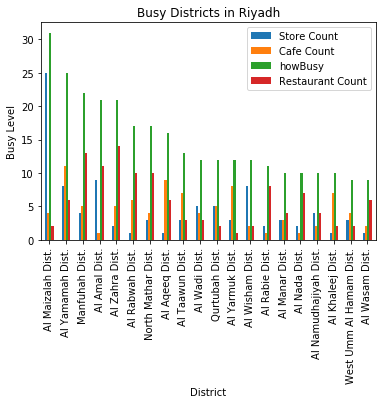

<Figure size 200x200 with 0 Axes>

In [61]:
riyadh_data[[ 'Store Count','Cafe Count', 'howBusy','Restaurant Count']].head(20).plot(kind='bar')
plt.title('Busy Districts in Riyadh')
plt.xlabel('District')
plt.ylabel('Busy Level')
plt.figure(figsize=(1,1), dpi=200) 

Draw Busy Districts on the Map

In [62]:
busy_districts = busy_districts.reset_index()
# create map of Riyadh using latitude and longitude values
map_busy = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map for each district
for lat, lng, label in zip(busy_districts['Latitude'], busy_districts['Longitude'], busy_districts['District']):
    if (lat is not np.nan and lng is not np.nan):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_busy)  
    
map_busy

### Step 7: Get the districts with lowest cafe avg rating, less number of Coffee shops around

Now, we have three features(How Busy is the area, number of cafe in the district and Avg Cafe rating) to decide on the best district for a new cafe. Based on the requirements: the district should be busy, have few coffee shops for less competition and low average cafe rate. To best achieve the goal of the study, I will use scoring method in which I will assign a specific scoring rate for each feature. 
1. How Busy feature :50%
2. Cafe Count: 30%
3. Avg Cafe Rating: 20%

Note: The scoring rates could be adjusted based on the requirements and the target of the new coffee shop owner.

#### lets calculate the Score for each of the 20 Busy districts

In [63]:
features = busy_districts[['howBusy', 'Avg Cafe Rating','Cafe Count']]

# Normalize the feature set
from sklearn import preprocessing
district_scores= preprocessing.StandardScaler().fit(features).transform(features)
df = pd.DataFrame(district_scores)
df.rename(columns={0:'howBusy',1:'Avg Cafe Rating', 2:'Cafe Count'}, inplace=True)
df = pd.concat([busy_districts[['District']], df], axis = 1)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,District,howBusy,Avg Cafe Rating,Cafe Count
0,Al Maizalah Dist.,2.677848,-2.001495,-0.201538
1,Al Yamamah Dist.,1.673655,-1.226540,2.363494
2,Manfuhah Dist.,1.171558,-0.709903,0.164895
3,Al Amal Dist.,1.004193,0.581688,-1.300838
4,Al Zahra Dist.,1.004193,1.873280,0.164895


In [64]:
# Calculate the score
df['Score'] = df['howBusy']* 0.5+ df['Cafe Count']* -0.3 + df['Avg Cafe Rating'] * -0.2
df.sort_values(by='Score', ascending= False, inplace= True)
best_districts = df.head()
best_districts.reset_index(drop=True, inplace =True)
best_districts = best_districts.merge(busy_districts[['District','Latitude','Longitude']], on='District')
best_districts

,District,howBusy,Avg Cafe Rating,Cafe Count,Score,Latitude,Longitude
0,Al Maizalah Dist.,2.677848,-2.001495,-0.201538,1.799684,24.791527,46.850795
1,Al Amal Dist.,1.004193,0.581688,-1.300838,0.776010,24.645703,46.719765
2,Manfuhah Dist.,1.171558,-0.709903,0.164895,0.678291,24.591191,46.730304
3,Al Yamamah Dist.,1.673655,-1.226540,2.363494,0.373087,24.589865,46.716110
4,Al Wisham Dist.,-0.502096,-1.032801,-0.934405,0.235833,24.646955,46.700661


#### Lests plot the results for the best districts for a new cafe on the map

In [65]:
# create map of Riyadh using latitude and longitude values
map_busy = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map for each district
for lat, lng, label, score in zip(best_districts['Latitude'], best_districts['Longitude'], best_districts['District'], best_districts['Score']):
    if (lat is not np.nan and lng is not np.nan):
        label = folium.Popup(label + "\n Score: "+ str(score), parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=8,
            popup= label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            parse_html=False).add_to(map_busy)  
    
map_busy

#### Insights on the results

we can say that the Five best districts for a new cafe in Riyadh (based on the requirements specified eralier) are stored in order:


In [66]:
best_districts[['District', 'Score']]

,District,Score
0,Al Maizalah Dist.,1.799684
1,Al Amal Dist.,0.776010
2,Manfuhah Dist.,0.678291
3,Al Yamamah Dist.,0.373087
4,Al Wisham Dist.,0.235833
